In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import time
import os
import datetime 

FILENAME_TRAIN = ['train_1/', 'train_2/', 'train_3/', 'train_4/', 'train_5/']
LOCATION = 'suwon'
DIR = '../../data/'

now = datetime.datetime.now()
print("started at: " + str(now))
class wifimodel():
    def __init__(self, location):
        self.location = location
        self.rssi_list = []
        self.rssi = dict()
        self.avg = []
        self.sum = 0.0
        for file in FILENAME_TRAIN:
            self.train_dir = f'{DIR}{location}/train/{file}'
            file_list = os.listdir(self.train_dir)
            for file in file_list:
                df = pd.read_csv(self.train_dir + file, sep="\t", engine='python', encoding="UTF-8", header=None)
                for data in list(df.iloc[:, 5]):
                    if data in self.rssi:
                        self.rssi[data] += 1
                    else:
                        self.rssi[data] = 1
                    self.sum += data
            self.avg.append(self.sum/sum(self.rssi.values())) 
            self.rssi_list.append(self.rssi)
            self.rssi = {}
            self.sum = 0.0
        
model = wifimodel(LOCATION)

started at: 2022-11-30 18:11:57.343240


In [4]:
model.avg

[-77.92243361550646,
 -71.92834539634674,
 -80.80991550924405,
 -78.24310028295656,
 -78.32125483600905]

In [6]:
x = []
y = []
for rssi in model.rssi_list:
    x.append(sorted(rssi.keys()))
    values = []
    for i in sorted(rssi.items()):
        values.append(i[1])
    y.append(values)


len(model.rssi_list)

5

In [7]:
def get_range(x,y,avg,range_rate):
    range_num = int(sum(y) * range_rate)
    num = 0
    index = x.index(round(avg))
    num = y[index]
    i=1
    while num < range_num:
        num += y[index + i]
        num += y[index - i]
        i += 1
    return index -i, index + i


-91 -65
-87 -57
-92 -70
-91 -65
-92 -64


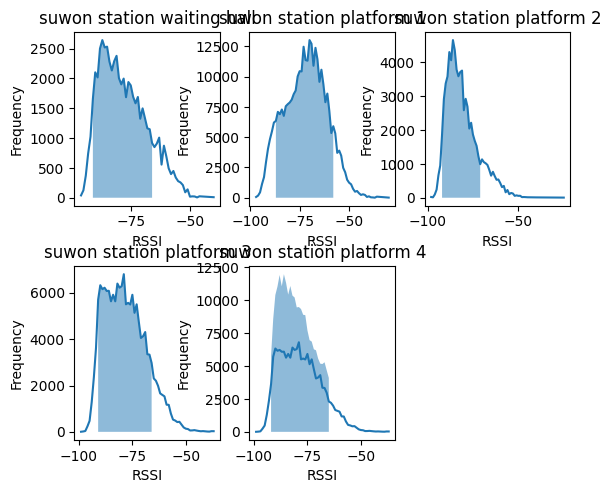

In [12]:
import matplotlib.pyplot as plt

range_rate = 0.8
index = []
plt.subplot(2,3,1)
plt.plot(x[0],y[0])
plt.title("suwon station waiting hall")
plt.xlabel("RSSI")
plt.ylabel("Frequency")
index = get_range(x[0], y[0], model.avg[0], range_rate=range_rate)
plt.fill_between(x[0][index[0]:index[1]], y[0][index[0]:index[1]], alpha=0.5)
print(x[0][index[0]], x[0][index[1]])

plt.subplot(2,3,2)
plt.plot(x[1],y[1])
plt.title("suwon station platform 1")
plt.xlabel("RSSI")
plt.ylabel("Frequency")
index = get_range(x[1], y[1], model.avg[1], range_rate=range_rate)
plt.fill_between(x[1][index[0]:index[1]], y[1][index[0]:index[1]], alpha=0.5)
print(x[1][index[0]], x[1][index[1]])
# print(index)

plt.subplot(2,3,3)
plt.plot(x[2],y[2])
plt.title("suwon station platform 2")
plt.xlabel("RSSI")
plt.ylabel("Frequency")
index = get_range(x[2], y[2], model.avg[2], range_rate=range_rate)
plt.fill_between(x[2][index[0]:index[1]], y[2][index[0]:index[1]], alpha=0.5)
print(x[2][index[0]], x[2][index[1]])
# print(index)

plt.subplot(2,3,4)
plt.plot(x[3],y[3])
plt.title("suwon station platform 3")
plt.xlabel("RSSI")
plt.ylabel("Frequency")
index = get_range(x[3], y[3], model.avg[3], range_rate=range_rate)
plt.fill_between(x[3][index[0]:index[1]], y[3][index[0]:index[1]], alpha=0.5)
print(x[3][index[0]], x[3][index[1]])
# print(index)


plt.subplot(2,3,5)
plt.plot(x[3],y[3])
plt.title("suwon station platform 4")
plt.xlabel("RSSI")
plt.ylabel("Frequency")
index = get_range(x[4], y[4], model.avg[4], range_rate=range_rate)
plt.fill_between(x[4][index[0]:index[1]], y[4][index[0]:index[1]], alpha=0.5)
print(x[4][index[0]], x[4][index[1]])

plt.subplots_adjust(bottom=0.051, top=0.9, wspace=0.2, hspace=0.35)
# plt.subplot(2,3,5)
# plt.plot(x_hana,y_hana)
# plt.title("하나스퀘어")
# plt.xlabel("RSSI")
# plt.ylabel("Frequency")
